<h1 style='text-align: center; '>🏠 CareerVillage: Extensive EDA with plotly 🏠</h1>
<h2 style='text-align: center;'> <a href="https://www.careervillage.org/about/">CareerVillage.org</a></h2>

![CareerVillage](https://d1qb2nb5cznatu.cloudfront.net/startups/i/268652-4a6237df3aace773e5b27615b67ec290-medium_jpg.jpg?buster=1493150813)
<h3 style='text-align: center;color: purple;' >"The world needs a cloud-based solution for career advice - CareerVillage is that solution."</h3>
*<h4 style='text-align: center;' >Hamza El Bouatmani - March 14th, 2019</h4>*

# Outline <a class="anchor" id="outline"></a>

1. [Introduction](#intro)
2. [Class Diagram](#diagram)
3. [Students](#students)
4. [Professionals](#professionals)
5. [Questions](#questions)
6. [Answers](#answers)
7. [Emails](#emails)
8. [School / Group Memberships](#memberships)


# 1. Introduction <a class="anchor" id="intro"></a> [↑](#outline)

### CareerVillage.org is a **nonprofit** that **crowdsources** career advice for underserved youth (*founded in 2011*).
### The platform matches the **career questions** students ask to a volunteer corp of over **10,000 working professionals** with relevant expertise.

### This Kernel attempts to provide an extensive **Exploratory Data Analysis** of the data provided by CareerVillage to Kagglers for [this competition](https://www.kaggle.com/c/data-science-for-good-careervillage). Most visualizations are done using Plotly library.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings('ignore')

tags_df = pd.read_csv('../input/tags.csv', index_col='tags_tag_id')
#comments_df = pd.read_csv('../input/comments.csv', index_col='comments_id', parse_dates=['comments_date_added'])


country_to_code_dic = {'Afghanistan': 'AFG', 'Albania': 'ALB', 'Algeria': 'DZA', 'American Samoa': 'ASM', 'Andorra': 'AND', 'Angola': 'AGO', 'Anguilla': 'AIA', 'Antigua and Barbuda': 'ATG', 'Argentina': 'ARG', 'Armenia': 'ARM', 'Aruba': 'ABW', 'Ascension and Tristan da Cunha': 'SHN', 'Australia': 'AUS', 'Austria': 'AUT', 'Azerbaijan': 'AZE', 'The Bahamas': 'BHM', 'Bahrain': 'BHR', 'Bangladesh': 'BGD', 'Barbados': 'BRB', 'Belarus': 'BLR', 'Belgium': 'BEL', 'Belize': 'BLZ', 'Benin': 'BEN', 'Bermuda': 'BMU', 'Bhutan': 'BTN', 'Bolivia': 'BOL', 'Bosnia and Herzegovina': 'BIH', 'Botswana': 'BWA', 'Brazil': 'BRA', 'British Virgin Islands': 'VGB', 'Brunei': 'BRN', 'Bulgaria': 'BGR', 'Burkina Faso': 'BFA', 'Burma': 'MMR', 'Burundi': 'BDI', 'Cabo Verde': 'CPV', 'Cambodia': 'KHM', 'Cameroon': 'CMR', 'Canada': 'CAN', 'Cayman Islands': 'CYM', 'Central African Republic': 'CAF', 'Chad': 'TCD', 'Chile': 'CHL', 'China': 'CHN', 'Colombia': 'COL', 'Comoros': 'COM', 'Democratic Republic of the Congo': 'COD', 'Republic of the Congo': 'COG', 'Cook Islands': 'COK', 'Costa Rica': 'CRI', "Cote d'Ivoire": 'CIV', 'Croatia': 'HRV', 'Cuba': 'CUB', 'Curacao': 'CUW', 'Cyprus': 'CYP', 'Czech Republic': 'CZE', 'Denmark': 'DNK', 'Djibouti': 'DJI', 'Dominica': 'DMA', 'Dominican Republic': 'DOM', 'Ecuador': 'ECU', 'Egypt': 'EGY', 'El Salvador': 'SLV', 'Equatorial Guinea': 'GNQ', 'Eritrea': 'ERI', 'Estonia': 'EST', 'Ethiopia': 'ETH', 'Falkland Islands (Islas Malvinas)': 'FLK', 'Faroe Islands': 'FRO', 'Fiji': 'FJI', 'Finland': 'FIN', 'France': 'FRA', 'French Polynesia': 'PYF', 'Gabon': 'GAB', 'The Gambia': 'GMB', 'Georgia': 'GEO', 'Germany': 'DEU', 'Ghana': 'GHA', 'Gibraltar': 'GIB', 'Greece': 'GRC', 'Greenland': 'GRL', 'Grenada': 'GRD', 'Guam': 'GUM', 'Guatemala': 'GTM', 'Guernsey': 'GGY', 'Guinea': 'GIN', 'Guinea-Bissau': 'GNB', 'Guyana': 'GUY', 'Haiti': 'HTI', 'Honduras': 'HND', 'Hong Kong': 'HKG', 'Hungary': 'HUN', 'Iceland': 'ISL', 'India': 'IND', 'Indonesia': 'IDN', 'Iran': 'IRN', 'Iraq': 'IRQ', 'Ireland': 'IRL', 'Isle of Man': 'IMN', 'Israel': 'ISR', 'Palestine': 'PSE', 'Italy': 'ITA', 'Jamaica': 'JAM', 'Japan': 'JPN', 'Jersey': 'JEY', 'Jordan': 'JOR', 'Kazakhstan': 'KAZ', 'Kenya': 'KEN', 'Kiribati': 'KIR', 'North Korea': 'PRK', 'South Korea': 'KOR', 'Kosovo': 'KSV', 'Kuwait': 'KWT', 'Kyrgyzstan': 'KGZ', 'Laos': 'LAO', 'Latvia': 'LVA', 'Lebanon': 'LBN', 'Lesotho': 'LSO', 'Liberia': 'LBR', 'Libya': 'LBY', 'Liechtenstein': 'LIE', 'Lithuania': 'LTU', 'Luxembourg': 'LUX', 'Macau': 'MAC', 'Macedonia': 'MKD', 'Madagascar': 'MDG', 'Malawi': 'MWI', 'Malaysia': 'MYS', 'Maldives': 'MDV', 'Mali': 'MLI', 'Malta': 'MLT', 'Marshall Islands': 'MHL', 'Mauritania': 'MRT', 'Mauritius': 'MUS', 'Mexico': 'MEX', 'Federated States of Micronesia': 'FSM', 'Moldova': 'MDA', 'Monaco': 'MCO', 'Mongolia': 'MNG', 'Montenegro': 'MNE', 'Morocco': 'MAR', 'Mozambique': 'MOZ', 'Namibia': 'NAM', 'Nepal': 'NPL', 'Netherlands': 'NLD', 'New Caledonia': 'NCL', 'New Zealand': 'NZL', 'Nicaragua': 'NIC', 'Niger': 'NER', 'Nigeria': 'NGA', 'Niue': 'NIU', 'Northern Mariana Islands': 'MNP', 'Norway': 'NOR', 'Oman': 'OMN', 'Pakistan': 'PAK', 'Palau': 'PLW', 'Panama': 'PAN', 'Papua New Guinea': 'PNG', 'Paraguay': 'PRY', 'Peru': 'PER', 'Philippines': 'PHL', 'Poland': 'POL', 'Portugal': 'PRT', 'Puerto Rico': 'PRI', 'Qatar': 'QAT', 'Romania': 'ROU', 'Russia': 'RUS', 'Rwanda': 'RWA', 'Saint Kitts and Nevis': 'KNA', 'Saint Lucia': 'LCA', 'Saint Martin': 'MAF', 'Saint Pierre and Miquelon': 'SPM', 'Saint Vincent and the Grenadines': 'VCT', 'Samoa': 'WSM', 'San Marino': 'SMR', 'Sao Tome and Principe': 'STP', 'Saudi Arabia': 'SAU', 'Senegal': 'SEN', 'Serbia': 'SRB', 'Seychelles': 'SYC', 'Sierra Leone': 'SLE', 'Singapore': 'SGP', 'Sint Maarten': 'SXM', 'Slovakia': 'SVK', 'Slovenia': 'SVN', 'Solomon Islands': 'SLB', 'Somalia': 'SOM', 'South Africa': 'ZAF', 'South Sudan': 'SSD', 'Spain': 'ESP', 'Sri Lanka': 'LKA', 'Sudan': 'SDN', 'Suriname': 'SUR', 'Swaziland': 'SWZ', 'Sweden': 'SWE', 'Switzerland': 'CHE', 'Syria': 'SYR', 'Taiwan': 'TWN', 'Tajikistan': 'TJK', 'Tanzania': 'TZA', 'Thailand': 'THA', 'Timor-Leste': 'TLS', 'Togo': 'TGO', 'Tonga': 'TON', 'Trinidad and Tobago': 'TTO', 'Tunisia': 'TUN', 'Turkey': 'TUR', 'Turkmenistan': 'TKM', 'Tuvalu': 'TUV', 'Uganda': 'UGA', 'Ukraine': 'UKR', 'United Arab Emirates': 'ARE', 'United Kingdom': 'GBR', 'USA': 'USA', 'Uruguay': 'URY', 'Uzbekistan': 'UZB', 'Vanuatu': 'VUT', 'Venezuela': 'VEN', 'Vietnam': 'VNM', 'Virgin Islands': 'VGB', 'West Bank': 'WBG', 'Yemen': 'YEM', 'Zambia': 'ZMB', 'Zimbabwe': 'ZWE', 'None': 'Unknown', '': 'Unknown', 'Unknown': 'Unknown'} 
code_to_country_dic = {v: k for k, v in country_to_code_dic.items()}
countries_per_continent_dic = {'Africa': ['Morocco', 'Algeria', 'Angola', 'Burkina Faso', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Ascension and Tristan da Cunha', 'Sudan', 'Cabo Verde', 'Mauritius', 'Eritrea', 'Jersey', 'Equatorial Guinea', 'Guinea-Bissau', 'Gabon', 'Mali', 'Sao Tome and Principe', 'Swaziland', 'Seychelles', 'Madagascar', 'Guinea', 'Libya', 'Mauritania', 'Mozambique', 'Togo', 'Niger', 'Tunisia', 'Senegal', 'The Gambia', 'Sierra Leone', 'Liberia', "Cote d'Ivoire", 'Ghana', 'Benin', 'Nigeria', 'Cameroon', 'Republic of the Congo', 'Namibia', 'South Africa', 'Botswana', 'Zimbabwe', 'Zambia', 'Malawi', 'Tanzania', 'Burundi', 'Rwanda', 'Uganda', 'Kenya', 'Somalia', 'Ethiopia', 'South Sudan', 'Egypt'], 'Europe': ['Spain', 'Portugal', 'France', 'Italy', 'Switzerland', 'Albania', 'Belgium', 'Andorra', 'Germany', 'Iceland', 'Luxembourg', 'Lithuania', 'Moldova', 'Montenegro', 'Belarus', 'Cyprus', 'Isle of Man', 'Bosnia and Herzegovina', 'Gibraltar', 'Faroe Islands', 'Liechtenstein', 'Malta', 'San Marino', 'Greece', 'Guernsey', 'Netherlands', 'Austria', 'Croatia', 'Monaco', 'Slovenia', 'Czech Republic', 'Denmark', 'Finland', 'Poland', 'Slovakia', 'Romania', 'Hungary', 'Serbia', 'Macedonia', 'Bulgaria', 'Ukraine', 'Estonia', 'Sweden', 'Norway', 'United Kingdom', 'Ireland'], 'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Burma', 'Cambodia', 'China', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Palestine', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'North Korea', 'South Korea', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'West Bank', 'Yemen',], 'North America': ['USA', 'Canada', 'Mexico', 'Cuba', 'Jamaica', 'Curacao', 'Dominican Republic', 'Bermuda', 'Puerto Rico', 'Honduras', 'Anguilla', 'Aruba', 'Panama', 'Guatemala', 'Haiti', 'Saint Kitts and Nevis', 'Saint Lucia', 'Dominica', 'Saint Martin', 'British Virgin Islands', 'Saint Pierre and Miquelon', 'Greenland', 'Saint Vincent and the Grenadines', 'Virgin Islands', 'Sint Maarten', 'Barbados', 'Belize', 'Antigua and Barbuda', 'Costa Rica', 'The Bahamas', 'Cayman Islands', 'Nicaragua', 'Grenada', 'El Salvador'], 'South America': ['Colombia', 'Trinidad and Tobago', 'Ecuador', 'Peru', 'Brazil', 'Bolivia', 'Chile', 'Argentina', 'Uruguay', 'Venezuela', 'Paraguay', 'Suriname', 'Guyana', 'Falkland Island', 'Falkland Islands (Islas Malvinas)'], 'Oceania': ['Australia', 'New Zealand', 'Papua New Guinea', 'American Samoa', 'New Caledonia', 'Northern Mariana Islands', 'Niue', 'Palau', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'Guam', 'French Polynesia', 'Fiji', 'Cook Islands', 'Marshall Islands', 'Federated States of Micronesia']} 
us_states_areas = "Alabama|Alaska|Arizona|Arkansas|California|Colorado|Connecticut|Delaware|Florida|Georgia|Hawaii|Idaho|Illinois|Indiana|Iowa|Kansas|Kentucky|Louisiana|Maine|Maryland|Massachusetts|Michigan|Minnesota|Mississippi|Missouri|Montana|Nebraska|Nevada|New Hampshire|Omaha|Bowling Green|Cincinnati|Chandler|New Jersey|New Mexico|New York|North Carolina|North Dakota|Ohio|Oklahoma|Oregon|Pennsylvania|Rhode Island|South Carolina|South Dakota|Tennessee|Texas|Utah|Vermont|Virginia|Washington|West Virginia|Wisconsin|Wyoming|Boston|New York|Philadelphia|Cleveland|Atlanta|Chicago|Minneapolis|Kansas|Dallas|San Francisco|Los Angeles|Boca Raton|Miami|Denver|Detroit|New Orleans|Orangevale|Lenexa|Merritt Island|Vacaville|Citrus Heights|Nashville|Cedar Rapids|West Hartford|Pittsburgh|Laguna Hills|Salt Lake City|Kennewick|Memphis|United States|Milwaukee|San Diego|St. Louis|Seattle|Lancaster"
continents = ['Africa', 'Europe', 'North America', 'South America', 'Asia', 'Oceania']
countries = list(country_to_code_dic.keys())
countries.remove('None')
countries.remove('Unknown')
countries.remove('')
countries = '|'.join(countries)

LINE_COLOR = '#9250B0'
BAR_COLOR = '#906FA8'
HIGHLIGHT_BAR_COLOR = '#db2d43'

# 2. Class Diagram <a class="anchor" id="diagram"></a>  [↑](#outline)

### Before we start playing with the data, let's have a quick look at its overall architecture using a [Class Diagram](https://en.wikipedia.org/wiki/Class_diagram).

### Description :
* There are two types of users: **Students** & **Professionals**.  They both share many attributes, but in some cases, each one can interact with specific other classes ( they inherit from the abstract class User ).
* Any **User** can :
    - follow a **Tag**
    - be member of a **Group**
    - be member of a **School**
    - write **Comments** on any **Content** ( both **Questions** & **Answers** are considered Content, therefore they also inherit from the abstract class Content)
* A student can:
    - ask **Questions**
* A Professional can:
    - post **Answers** to Questions
    - receive **Emails** containing questions that he can potentially answer


![class_diagram](https://i.imgur.com/oBeYEM0.png)

# 3. Students <a class="anchor" id="students"></a> [↑](#outline)


![students](https://i.imgur.com/CX2XelQ.jpg)
<span style="float: right;"><a href="https://www.pexels.com/photo/accomplishment-ceremony-education-graduation-267885/">Source</a></span>

In [2]:
students_df = pd.read_csv('../input/students.csv', index_col='students_id', parse_dates=['students_date_joined'])
tag_users_df = pd.read_csv('../input/tag_users.csv')

years = students_df['students_date_joined'].dt.year.unique()
years.sort()
min_date = students_df['students_date_joined'].min()
min_date = min_date.strftime("%B %Y")
max_date = students_df['students_date_joined'].max()
max_date = max_date.strftime("%B %Y")
#print(years)
vals = [len(students_df[students_df['students_date_joined'].dt.year == y]) for y in years] 
#print(vals)
fig = {
    'data': [{
        'type': 'scatter',
        'x': years,
        'y': vals,
        'line': {'color': LINE_COLOR}
    }],
    'layout': {
        'title': f'Number of Student Registrations per year ({min_date} ~ {max_date})',
        'yaxis': {'title': 'Number of Students'},
        'xaxis': {'title': 'Years'}
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** We notice that the number of Students registrations per year increases consistently starting from 2011, reaching its tipping point in 2016, then it drops in 2017 and increases again in 2018. **The actual number of Students in the Databases is : 30971**

In [3]:
def process_location(df, type_user):
    # Add Country Column
    df[f'{type_user}_location'] = df[f'{type_user}_location'].fillna('Unknown')
    df[f'{type_user}_country_name'] = ''
    df[f'{type_user}_country_name'] = df[f'{type_user}_location'].str.extract(f'({countries})')[0]
    df.loc[df[f'{type_user}_location'] == 'Unknown', f'{type_user}_country_name'] = 'Unknown'
    df.loc[df[f'{type_user}_country_name'] == '', f'{type_user}_country_name'] = 'Unknown'
    df[f'{type_user}_country_name'] = df[f'{type_user}_country_name'].fillna('Unknown')
    df.loc[df[f'{type_user}_location'].str.contains(us_states_areas), f'{type_user}_country_name'] = 'USA'

    #indexes = df[ (df[f'{type_user}_location'].str.match('[A-z ]*, [A-z ]*')) & (df[f'{type_user}_country'] != 'USA')].index.values
    #countries = df[ (df[f'{type_user}_location'].str.match('[A-z ]*, [A-z ]*')) & (df[f'{type_user}_country'] != 'USA')][f'{type_user}_location'].str.extract(', ([A-z ]*)$')
    #df.loc[df.index.isin(indexes), f'{type_user}_country'] = countries.values

    # Deal with some exceptions
    df.loc[df[f'{type_user}_location'].str.contains('Czechia'), f'{type_user}_country_name'] = 'Czech Republic'
    df.loc[df[f'{type_user}_location'].str.contains('County Dublin'), f'{type_user}_country_name'] = 'Ireland'
    df.loc[df[f'{type_user}_location'].str.contains('County Tipperary'), f'{type_user}_country_name'] = 'Ireland'
    df.loc[df[f'{type_user}_location'].str.contains('Birmingham'), f'{type_user}_country_name'] = 'Ireland'
    df.loc[df[f'{type_user}_location'].str.contains('Limerick'), f'{type_user}_country_name'] = 'Ireland'
    df.loc[df[f'{type_user}_location'].str.contains('Cape Verde'), f'{type_user}_country_name'] = 'Cabo Verde'
    df.loc[df[f'{type_user}_location'].str.contains('Bethlehem'), f'{type_user}_country_name'] = 'Palestine'
    df.loc[df[f'{type_user}_location'].str.contains('Palestinian Territory'), f'{type_user}_country_name'] = 'Palestine'
    df.loc[df[f'{type_user}_location'].str.contains('Brasilia'), f'{type_user}_country_name'] = 'Brazil'
    df.loc[df[f'{type_user}_location'].str.contains('Ivoire'), f'{type_user}_country_name'] = "Cote d'Ivoire"
    df.loc[df[f'{type_user}_location'].str.contains('Slovak'), f'{type_user}_country_name'] = "Slovakia"

    #df.loc[df[f'{type_user}_location'].str.contains('Burma'), f'{type_user}_country_name'] = 'Burma'
    #df.loc[df[f'{type_user}_location'].str.contains('Ivoire'), f'{type_user}_country_name'] = 'Cote d\'Ivoire'
    
    # Add Code Column
    df[f'{type_user}_country_code'] = df[f'{type_user}_country_name'].apply(lambda x: country_to_code_dic[x])
    return df

def get_continent(country_name):
    for cont in continents:
        if country_name in countries_per_continent_dic[cont]:
            return cont
    return 'Unknown'
#get_continent('China')

students_df = process_location(students_df, 'students')

count_students_per_country = students_df.groupby('students_country_code').count()[['students_country_name']].rename(columns={'students_country_name': 'Count Students'}).sort_values('Count Students', ascending=False)
count_students_per_country['Country Name'] = [code_to_country_dic[c] for c in count_students_per_country.index.values]
fig = {
    'data': [{
        'type': 'choropleth',
        'z': count_students_per_country['Count Students'],
        'locations': count_students_per_country.index.values, 
        'text': count_students_per_country['Country Name'],
        'colorscale': [
            [0, "rgb(5, 10, 172)"],
            [0.3, "rgb(70, 100, 245)"],
            [0.6, "rgb(90, 120, 245)"],
            [0.7, "rgb(106, 137, 247)"],
            [1, "rgb(220, 220, 220)"]
        ],
        'reversescale':  True,
    }],
    'layout': {
        'title': 'Number of Students per Country'
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** It is clear that most of the students registered are based on the U.S (** over 24k !** ). The second country with most students is India ( **~ 2500 students** ). In the nexts charts, we'll take a closer look at each continent.
#### **<span style="color: blue">Note: </span>** *The Map is interactive. Feel free to hover over the countries to see the numbers.*

In [4]:
count_students_per_country['Country Continent'] = count_students_per_country['Country Name'].apply(get_continent)
count_students_per_continent = count_students_per_country.groupby('Country Continent').sum().sort_values('Count Students', ascending=False)
#count_students_per_continent

fig = {
    'data': [{
        'type': 'bar',
        'x': count_students_per_continent['Count Students'],
        'y': count_students_per_continent.index.values,
        'orientation': 'h',
        'marker': {'color': [BAR_COLOR if count_students_per_continent.index.values[i] != 'Unknown' else 'grey' for i in range(len(count_students_per_continent))]}
    }],
    'layout': {
        'title': 'Number of Students per Continent',
        'xaxis': {'title': 'Number of Students'},
        'yaxis': {'autorange': 'reversed'},
        'margin': {'l': 130}
    }
}
iplot(fig)

In [5]:
charts = []
for c in continents:
    gp = count_students_per_country[count_students_per_country['Country Continent'] == c]
    labels = list(gp.head(3)['Country Name'])
    values = list(gp.head(3)['Count Students'])
    labels.append('Other')
    values.append(gp.tail(len(gp) - 3)['Count Students'].sum())
    charts.append({
        'type': 'pie',
        'title': { 'text': c, 'font': {'size': 20}},
        'name': c,
        'labels': labels,
        'values': values,
        'textinfo': 'label+percent',
        'showlegend': False,
        'hole': .3
    })
    #print(labels)
    #print(values)

for i in range(len(charts)):
        charts[i]['domain'] = {'x': [0, .4] if i%2 == 0 else [.6, 1] , 'y': [0, 1]}

fig = {
    'data': charts[:2],
    'layout': {
        'title': 'Where are most Students based ?'
    }
}
iplot(fig)
fig = {
    'data': charts[2:4]
}
iplot(fig)
fig = {
    'data': charts[4:6]
}
iplot(fig)

### **<span style="color: red">Observation: </span>** 
* North America comes naturally first in terms of number of students, but from it's pie chart, we can see that **97%** of the students from this continent are based in the **U.S.A**
* Asia comes next, with most of its students from India: **~ 85%**
* 2163 students have unknown locations, which is **~ 7%** of the total number of students
* African students number amount to 424, **~ 60%** of it come from 3 main countries: **Egypt**, **Niger** , and **South Africa**
* Students from Europe come mostly from **UK** (~50%)
* Most of South American students are **argentinians** ( ~40% ), **brazialians** (~21%) and **uruguayans** (~13%)
* Lastly, students from Oceanian continent come of course mostly from **Australia** (~72%) and **New Zealand **(~21%)

In [6]:
tag_counts = tag_users_df[tag_users_df['tag_users_user_id'].isin(students_df.index.values)].groupby('tag_users_tag_id').count().sort_values('tag_users_user_id', ascending=False)
new_index = []
for i in tag_counts.index.values:
    new_index.append(tags_df.loc[i][0])
#new_index
tag_counts = tag_counts.set_index(pd.Series(new_index))
tag_counts = tag_counts.rename(columns={'tag_users_user_id': 'Number of Students'})
n = 10
fig = {
    'data': [{
        'type': 'bar',
        'x': tag_counts.head(n)['Number of Students'],
        'y': tag_counts.head(n).index.values,
        'orientation': 'h',
        'marker': {'color': [HIGHLIGHT_BAR_COLOR if i == 0 else BAR_COLOR for i in range(n)]},
    }],
    'layout': {
        'title': f'Top {n} Followed Hashtags by Students', 
        'yaxis': {'autorange': 'reversed'},
        'xaxis': {'title': 'Number of Followers'}
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** Most Students follow **'college**' related topics, followed by '**business**' and '**engineering**'

# 4. Professionals <a class="anchor" id="professionals"></a> [↑](#outline)

![professionals](https://i.imgur.com/G9F3KHF.jpg)
<span style="float: right;"><a href="https://www.pexels.com/photo/people-taking-group-photo-1374360/">Source</a></span>

In [7]:
professionals_df = pd.read_csv('../input/professionals.csv', index_col='professionals_id', parse_dates=['professionals_date_joined'])

years = professionals_df['professionals_date_joined'].dt.year.unique()
years.sort()
min_date = professionals_df['professionals_date_joined'].min()
min_date = min_date.strftime("%B %Y")
max_date = professionals_df['professionals_date_joined'].max()
max_date = max_date.strftime("%B %Y")
#print(years)
vals = [len(professionals_df[professionals_df['professionals_date_joined'].dt.year == y]) for y in years] 
#print(vals)
fig = {
    'data': [{
        'type': 'scatter',
        'x': years,
        'y': vals,
        'line': {'color': LINE_COLOR}
    }],
    'layout': {
        'title': f'Number of Professionals Registrations per year ({min_date} ~ {max_date})',
        'yaxis': {'title': 'Number of Professionals'},
        'xaxis': {'title': 'Years'}
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** The number of Professionals grows each year. **The actual number of professionals in the Database is : 28152 professionals.**

In [8]:
professionals_df = process_location(professionals_df, 'professionals')
count_professionals_per_country = professionals_df.groupby('professionals_country_code').count()[['professionals_country_name']].rename(columns={'professionals_country_name': 'Count Professionals'}).sort_values('Count Professionals', ascending=False)
count_professionals_per_country['Country Name'] = [code_to_country_dic[c] for c in count_professionals_per_country.index.values]

fig = {
    'data': [{
        'type': 'choropleth',
        'z': count_professionals_per_country['Count Professionals'],
        'locations': count_professionals_per_country.index.values, 
        'text': count_professionals_per_country['Country Name'],
        'colorscale': [
            [0, "rgb(5, 10, 172)"],
            [0.3, "rgb(70, 100, 245)"],
            [0.6, "rgb(90, 120, 245)"],
            [0.7, "rgb(106, 137, 247)"],
            [1, "rgb(220, 220, 220)"]
        ],
        'reversescale':  True,
    }],
    'layout': {
        'title': 'Number of Professionals per Country'
    }
}
iplot(fig)

In [9]:
count_professionals_per_country['Country Continent'] = count_professionals_per_country['Country Name'].apply(get_continent)
count_professionals_per_continent = count_professionals_per_country.groupby('Country Continent').sum().sort_values('Count Professionals', ascending=False)
#count_professionals_per_continent

fig = {
    'data': [{
        'type': 'bar',
        'x': count_professionals_per_continent['Count Professionals'],
        'y': count_professionals_per_continent.index.values,
        'orientation': 'h',
        'marker': {'color': [BAR_COLOR if count_professionals_per_continent.index.values[i] != 'Unknown' else 'grey' for i in range(len(count_professionals_per_continent))]}
    }],
    'layout': {
        'title': 'Number of Professionals per Continent',
        'xaxis': {'title': 'Number of Professionals'},
        'yaxis': {'autorange': 'reversed'},
        'margin': {'l': 130}
    }
}
iplot(fig)

In [10]:
charts = []
for c in continents:
    gp = count_professionals_per_country[count_professionals_per_country['Country Continent'] == c]
    labels = list(gp.head(3)['Country Name'])
    values = list(gp.head(3)['Count Professionals'])
    labels.append('Other')
    values.append(gp.tail(len(gp) - 3)['Count Professionals'].sum())
    charts.append({
        'type': 'pie',
        'title': { 'text': c, 'font': {'size': 20}},
        'name': c,
        'labels': labels,
        'values': values,
        'textinfo': 'label+percent',
        'showlegend': False,
        'hole': .3
    })
    #print(labels)
    #print(values)

for i in range(len(charts)):
        charts[i]['domain'] = {'x': [0, .4] if i%2 == 0 else [.6, 1] , 'y': [0, 1]}

fig = {
    'data': charts[:2],
    'layout': {
        'title': 'Where are most Professionals based ?'
    }
}
iplot(fig)
fig = {
    'data': charts[2:4]
}
iplot(fig)
fig = {
    'data': charts[4:6]
}
iplot(fig)

### **<span style="color: red">Observation: </span>** Again, **~ 3143** (out of 28152) Professionals have unknown locations ( ~11% ), the others are distibuted as shown above.

In [11]:
professionals_df['professionals_industry'] = professionals_df['professionals_industry'].fillna('unknown')
professionals_df['professionals_industry'] = professionals_df['professionals_industry'].str.lower()

count_industries = professionals_df.groupby('professionals_industry').count()[['professionals_location']].rename(columns={'professionals_location': 'Count Professionals'}).sort_values('Count Professionals', ascending=False)
n = 10
colors = []
for i in range(n):
    if count_industries.index.values[i] == 'unknown':
        colors.append('grey')
    elif i < 4:
        colors.append(HIGHLIGHT_BAR_COLOR)
    else:
        colors.append(BAR_COLOR)

fig = {
    'data': [{
        'type': 'bar', 
        'y': count_industries.head(n).index.values,
        'x': count_industries.head(n)['Count Professionals'].values,
        'marker': {'color': colors},
        'orientation': 'h',
    }],
    'layout': {
        'title': f'Top {n} Professionals Industries',
        'xaxis': {'title': 'Number of Professionals'},
        'yaxis': {'autorange': 'reversed'},
        'margin': {'l': 250}
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** 
### - Each Professional can provide the industry he works in. We notice first that there are **2576 entries** where the industry field is missing.
### - One other important thing to note, is that the Top 3 Industries professionals work in, are all related to IT ( **~ 6500**  professionals in total work in IT-related companies ) !

<Figure size 432x288 with 0 Axes>

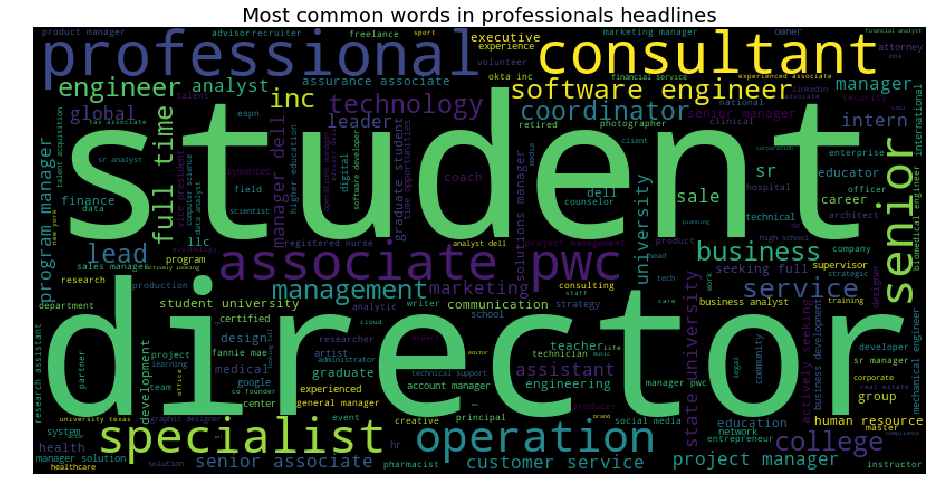

In [12]:
professionals_df['professionals_headline'] = professionals_df['professionals_headline'].fillna('unknown')
professionals_df['professionals_headline'] = professionals_df['professionals_headline'].str.lower()
professionals_df['professionals_headline'] = professionals_df['professionals_headline'].str.replace('--|hello|hello!|hellofresh', 'unknown')

words = ' '.join(list(professionals_df[professionals_df['professionals_headline'] != 'unknown']['professionals_headline'].values))
wc=WordCloud(width=800, height=400).generate(words)
plt.clf()
plt.figure( figsize=(16,9) )
plt.title('Most common words in professionals headlines', fontsize=20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [13]:
professionals_df['professionals_occupation'] = 'unknown'

res = professionals_df[professionals_df['professionals_headline'].str.contains(' at ')]['professionals_headline'].str.extract('([A-z ]*) at [A-z ]*')
professionals_df.loc[res.index.values, 'professionals_occupation'] = res[0]


professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?student|estudiant|master[ ]?'), 'professionals_occupation'] = 'student'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?intern[ ]?'), 'professionals_occupation'] = 'intern'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?engineer|developer|data scientist|database|technical specialist|technical support|technician[ ]?'), 'professionals_occupation'] = 'engineer'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?technical specialist|technical support|technician[ ]?'), 'professionals_occupation'] = 'technician'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?business|marketing|marketer|sales[ ]?'), 'professionals_occupation'] = 'business'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?marketing|marketer[ ]?'), 'professionals_occupation'] = 'marketer'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?sales[ ]?'), 'professionals_occupation'] = 'sales'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?ux|user experience|graphic|illustrator[ ]?'), 'professionals_occupation'] = 'designer'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?recuiter[ ]?'), 'professionals_occupation'] = 'recruiter'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?teacher|professor[ ]?'), 'professionals_occupation'] = 'teaching'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?accountant[ ]?'), 'professionals_occupation'] = 'accountant'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?financial [a-z ]?(profess|analyst)?'), 'professionals_occupation'] = 'financial_professional'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?medical doctor|physician[ ]?'), 'professionals_occupation'] = 'physician'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?therapist[ ]?'), 'professionals_occupation'] = 'therapist'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?nurse[ ]?'), 'professionals_occupation'] = 'nurse'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?manager|mgr[ ]?'), 'professionals_occupation'] = 'manager'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?ceo|chief operating officer[ ]?'), 'professionals_occupation'] = 'CEO'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?director[ ]?'), 'professionals_occupation'] = 'director'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?consultant[ ]?'), 'professionals_occupation'] = 'consultant'
professionals_df.loc[professionals_df['professionals_headline'].str.contains('[ ]?seeking|looking|unemployed[ ]?'), 'professionals_occupation'] = 'seeking_new_opportunity'


res = professionals_df.loc[(professionals_df['professionals_headline'].str.contains('[ ]?[a-z][e|o]r[ ]?$')) & (professionals_df['professionals_occupation'] == 'unknown')]['professionals_headline'].str.extract('[ ]?([a-z]*[e|o]r)[ ]?$')
professionals_df.loc[res.index.values, 'professionals_occupation'] = res[0]


count_professionals_per_occupation = professionals_df.groupby('professionals_occupation').count()[['professionals_headline']].rename(columns={'professionals_headline': 'Count Professionals'}).sort_values('Count Professionals', ascending=False)
#count_professionals_per_occupation.head(100)
n = 30
colors = []
for i in range(n):
    if count_professionals_per_occupation.index.values[i] == 'unknown':
        colors.append('grey')
    elif i < 4:
        colors.append(HIGHLIGHT_BAR_COLOR)
    else:
        colors.append(BAR_COLOR)

fig = {
    'data': [{
        'type': 'bar', 
        'y': count_professionals_per_occupation.head(n).index.values,
        'x': count_professionals_per_occupation.head(n)['Count Professionals'].values,
        'marker': {'color': colors},
        'orientation': 'h',
    }],
    'layout': {
        'title': f'Top {n} Professionals Occupations',
        'xaxis': {'title': 'Number of Professionals'},
        'yaxis': {'autorange': 'reversed'},
        'margin': {'l': 180},
        'height': 800
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** Applying some regex on the headlines, I was able to extract and categorize the occupations of many professional .

In [14]:
tag_counts = tag_users_df[tag_users_df['tag_users_user_id'].isin(professionals_df.index.values)].groupby('tag_users_tag_id').count().sort_values('tag_users_user_id', ascending=False)
new_index = []
for i in tag_counts.index.values:
    new_index.append(tags_df.loc[i][0])
#new_index
tag_counts = tag_counts.set_index(pd.Series(new_index))
tag_counts = tag_counts.rename(columns={'tag_users_user_id': 'Number of Professionals'})
n = 10
fig = {
    'data': [{
        'type': 'bar',
        'x': tag_counts.head(n)['Number of Professionals'],
        'y': tag_counts.head(n).index.values,
        'orientation': 'h',
        'marker': {'color': [HIGHLIGHT_BAR_COLOR if i < 3 else BAR_COLOR for i in range(n)]}
    }],
    'layout': {
        'title': f'Top {n} Followed Hashtags by Professionals', 
        'yaxis': {'autorange': 'reversed'},
        'xaxis': {'title': 'Number of Followers'},
        'margin': {'l': 150}
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** The chart shows the Top Tags followed by professionals. Since most professionals work in IT ( as shown in the previous chart ), the most followed Tags are also related to IT.

In [15]:
answers_df = pd.read_csv('../input/answers.csv', index_col='answers_id', parse_dates=['answers_date_added'])

count_answers = answers_df[answers_df['answers_author_id'].isin(professionals_df.index.values)].groupby('answers_author_id').count()[['answers_question_id']].rename(columns={'answers_question_id': 'Count Answers'}).sort_values('Count Answers', ascending=False)
professionals_df['professionals_total_answers'] = 0
professionals_df.loc[count_answers.index, 'professionals_total_answers'] = count_answers['Count Answers']

n = 10
fig = {
    'data': [{
        'type': 'bar',
        'x': count_answers.head(n)['Count Answers'].values,
        'y': count_answers.head(n).index.values,
        'orientation': 'h',
        'marker': {'color': BAR_COLOR}
    }],
    'layout': {
        'title': f'Top {n} Professionals with most answers',
        'yaxis': {'autorange': 'reversed'},
        'margin': {'l': 250}
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** There are some *HERO* professionals who answered more than a 1000 questions each ! In total, the Top 10 professionals are responsible for **12%** of the total answers in the platform (6344 answers !)

#### **<span style="color: blue">Note: </span>** : *For understandable privacy reasons, CareerVillage didn't provide the names of Professionals & Students. So we'll have to deal with the *ugly-looking* IDs :)*

In [16]:
professionals_df['professionals_total_answers'] = 0
professionals_df.loc[count_answers.index, 'professionals_total_answers'] = count_answers.values

fig = {
    'data': [{
        'type': 'pie',
        'labels': ['Zero answers', '> 0 answers'],
        'values': [len(professionals_df[professionals_df['professionals_total_answers'] == 0]), len(professionals_df[professionals_df['professionals_total_answers'] > 0])],
        'textinfo': 'label+percent',
        'showlegend': False,
        'marker': {'colors': [ '#00FF66', '#D9BCDB',], 'line': {'width': 3, 'color': 'white'}},
    }],
    'layout': {
        'title': 'Professionals who didn\'t contribute with answers'
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** There are **over 18000** professionals who didn't post any answer ! ( thus the need for a good **recommendation engine** )


# 5. Questions <a class="anchor" id="questions"></a> [↑](#outline)

![question](https://i.imgur.com/HupP118.jpg)
<span style="float: right;"><a href="https://www.pexels.com/photo/ask-blackboard-chalk-board-chalkboard-356079/">Source</a></span>

In [17]:
questions_df = pd.read_csv('../input/questions.csv', index_col='questions_id', parse_dates=['questions_date_added'])
tag_questions_df = pd.read_csv('../input/tag_questions.csv')

years = questions_df['questions_date_added'].dt.year.unique()
years.sort()
min_date = questions_df['questions_date_added'].min()
min_date = min_date.strftime("%B %Y")
max_date = questions_df['questions_date_added'].max()
max_date = max_date.strftime("%B %Y")
#print(years)
vals = [len(questions_df[questions_df['questions_date_added'].dt.year == y]) for y in years] 
#print(vals)
fig = {
    'data': [{
        'type': 'scatter',
        'x': years,
        'y': vals,
        'line': {'color': LINE_COLOR}
    }],
    'layout': {
        'title': f'Number of Questions asked per year ({min_date} ~ {max_date})',
        'yaxis': {'title': 'Number of Questions'},
        'xaxis': {'title': 'Years'}
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** The number of questions asked follows the same pattern as the number of Students Registrations, it reached its peak in 2016, slipped back in 2017 and started increasing again in 2018. **The Total number of questions in the Database is : 23931 questions**

In [18]:
count_answers = answers_df.groupby('answers_question_id').count().rename(columns={'answers_author_id': 'Count Answers'})[['Count Answers']].join(questions_df[['questions_body', 'questions_date_added']]).sort_values('Count Answers', ascending=False)
count_answers = count_answers[['questions_body', 'Count Answers', 'questions_date_added']]
count_answers["questions_date_added"] = count_answers["questions_date_added"].dt.strftime('%m-%d-%Y')
count_answers["questions_date_added"] = '[' + count_answers["questions_date_added"] + ']'
count_answers["questions_body"] =  count_answers["questions_date_added"] + ' ' + count_answers["questions_body"]
#count_answers.head()
n = 7
fig = {
    'data': [{
        'type': 'table',
        'header': {
            'values': ['Question', 'Number of Answers Received'],
            'fill': {'color': '#774181'},
            'font': {'color': '#f6e5e5', 'size': 14}},
        'cells': {'values': [count_answers.head(n)['questions_body'], count_answers.head(n)['Count Answers']],
                 'fill': {'color': '#e3e7f1'},
                'font': {'color': 'black', 'size': 14}, 
                 'align': 'left',
                 'height': 50},
    }],
    'layout': {
        'title': 'Questions that got most Answers',
        'height': 950
    }
}
iplot(fig)

In [19]:
vals = [len(set(questions_df.index.values) - set(answers_df['answers_question_id'])), len(set(answers_df['answers_question_id'])), ]
fig = {
    'data': [{
        'type': 'pie',
        'labels': ['Not Answered', 'Answered'],
        'values': vals,
        'marker': {'colors': [  '#8186d5', '#c6cbef', ]},
        'textinfo': 'label+percent',
        'showlegend': False,
        'hole': .3
    }],
    'layout': {
        'title': 'Questions: Answered vs Not Answered',
    }
}
iplot(fig)

# 6. Answers <a class="anchor" id="answers"></a> [↑](#outline)

![Answers](https://i.imgur.com/czATdXq.jpg)
<span style="float: right;"><a href="https://www.pexels.com/photo/people-taking-group-photo-1374360/">Source</a></span>


In [20]:
years = answers_df['answers_date_added'].dt.year.unique()
years.sort()
min_date = answers_df['answers_date_added'].min()
min_date = min_date.strftime("%B %Y")
max_date = answers_df['answers_date_added'].max()
max_date = max_date.strftime("%B %Y")
#print(years)
vals = [len(answers_df[answers_df['answers_date_added'].dt.year == y]) for y in years] 
#print(vals)
fig = {
    'data': [{
        'type': 'scatter',
        'x': years,
        'y': vals,
        'line': {'color': LINE_COLOR}
    }],
    'layout': {
        'title': f'Number of Answers added per year ({min_date} ~ {max_date})',
        'yaxis': {'title': 'Number of Answers'},
        'xaxis': {'title': 'Years'}
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** The number of answers follows the same pattern as the number of Students Registrations and yearly question numbers.

In [21]:
answers_df = answers_df.join(questions_df[['questions_date_added']], on='answers_question_id')
answers_df['diff_days'] = (answers_df['answers_date_added'] - answers_df['questions_date_added'])/np.timedelta64(1,'D')
vals = [answers_df[answers_df['questions_date_added'].dt.year == y]['diff_days'].mean() for y in years]
fig = {
    'data': [{
        'type': 'scatter',
        'x': years,
        'y': vals,
        'line': {'color': LINE_COLOR}
    }],
    'layout': {
        'title': 'Evolution of Mean Response Time per year',
        'xaxis': {'title': 'Years'},
        'yaxis': {'title': 'Mean Response Time in days'}
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** The Mean Response Time is an important metric, which shows **how quickly people post answers to a question in average** ( this metric is not related to emails ). In this chart, we clearly see that it's decreasing each year ( except in 2016 ), going from ~ 800 days in 2011 to only ~ 62 days in 2018.

#### **<span style="color: blue">Important: </span>** To compute this metric, I averaged number of days elapsed between each answer's post date and  the corresponding question's post date for all questions of each year.

In [22]:
# Answers after email ?
emails_df = pd.read_csv('../input/emails.csv', index_col='emails_id', parse_dates=['emails_date_sent'], infer_datetime_format=True)

matches_df = pd.read_csv('../input/matches.csv')
matches_df = matches_df.join(emails_df[['emails_recipient_id', 'emails_date_sent']], on='matches_email_id')

answers_df = answers_df.rename(columns={'answers_question_id': 'question_id', 'answers_author_id': 'author_id'})
matches_df = matches_df.rename(columns={'matches_question_id': 'question_id', 'emails_recipient_id': 'author_id'})
m = answers_df.reset_index().merge(matches_df, on=['question_id', 'author_id']).set_index('answers_id')
m = m.drop(m[m['answers_date_added'] < m['emails_date_sent']].index) # drop answers that were posted before the email was sent
answers_df['answers_after_email'] = False
answers_df.loc[answers_df.index.isin(m.index.values), 'answers_after_email'] = True
answers_df = answers_df.rename(columns={'question_id': 'answers_question_id' , 'author_id': 'answers_author_id'})
matches_df = matches_df.rename(columns={'question_id': 'matches_question_id', 'author_id': 'emails_recipient_id'})

fig = {
    'data': [
        {
        'type': 'pie',
        'labels': ['Answers to questions that were included into the emails ( after the email was sent )', 'Answers which were not affected by the email recommendation system'],
        'values': [ len(answers_df[answers_df['answers_after_email'] == True]), len(answers_df[answers_df['answers_after_email'] == False]) ],
        'marker': {'colors': [ '#00FF66', '#D9BCDB',], 'line': {'width': 3, 'color': 'white'}},
        }
    ],
    'layout': {
        'title': 'How many answers were posted after the email was sent ?',
        'legend': {'orientation': 'h'}
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** This chart is **<span style="color: red;">VERY IMPORTANT</span> **! It is hard to know if a professional has answered a question because he read it in the email, but if he answered the question before the email was sent, or answered a question that wasn't in any email sent to him, we can conclude with confidence that it was not a direct consequence of the recommendations engine ! From this chart,  we can see that most of the answers were not posted after the recommendation email was sent. Hence, the **need for a better recommendation system** !

# 7. Emails <a class="anchor" id="emails"></a> [↑](#outline)

![Emails](https://i.imgur.com/TjvBNfG.jpg)
<span style="float: right;"><a href="https://www.pexels.com/photo/business-communication-computer-connection-261706/">Source</a></span>


In [23]:
#matches_df = pd.read_csv('../input/matches.csv', index_col='matches_email_id')


years = emails_df['emails_date_sent'].dt.year.unique()
years.sort()
min_date = emails_df['emails_date_sent'].min()
min_date = min_date.strftime("%B %Y")
max_date = emails_df['emails_date_sent'].max()
max_date = max_date.strftime("%B %Y")
#print(years)
vals = [len(emails_df[emails_df['emails_date_sent'].dt.year == y]) for y in years] 
#print(vals)

fig = {
    'data': [{
        'type': 'scatter',
        'x': years,
        'y': vals,
        'line': {'color': LINE_COLOR}
    }],
    'layout': {
        'title': f'Number of Emails sent per year ({min_date} ~ {max_date})',
        'yaxis': {'title': 'Number of Emails'},
        'xaxis': {'title': 'Years'}
    }
}
iplot(fig)

In [24]:
count_emails = emails_df.groupby('emails_frequency_level').count()[['emails_recipient_id']].rename(columns={'emails_recipient_id': 'Count Emails'})
vals = [count_emails.loc['email_notification_daily']['Count Emails'], count_emails.loc['email_notification_weekly']['Count Emails'], count_emails.loc['email_notification_immediate']['Count Emails']]

fig = {
    'data': [{
        'type': 'pie',
        'labels': ['Daily', 'Weekly', 'Immediate'],
        'values': vals,
        'marker': {'colors': ['#D9BCDB', '#906FA8', '#AAC3DF']},
        'textinfo': 'label+percent',
        'showlegend': False,
        'hole': .3
    
    }],
    'layout': {
        'title': 'Number of Emails per Frequency Level',
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>** There are ~ 1.85 Million Emails in the Database, most of them are ones sent daily.

In [25]:
count_questions = matches_df.groupby('matches_email_id').count().rename(columns={'matches_question_id': 'Count Questions'}).sort_values('Count Questions', ascending=False)
emails_df['emails_nbr_questions'] = 0
emails_df.loc[count_questions.index, 'emails_nbr_questions'] = count_questions['Count Questions']

emails_numbers = emails_df['emails_nbr_questions'].value_counts()
emails_numbers[emails_numbers.index.values == 0]
vals = []
vals.append(emails_numbers.loc[0])
vals.append(emails_numbers.loc[1])
vals.append(emails_numbers.loc[2])
vals.append(emails_numbers.loc[3])
vals.append(emails_numbers[(emails_numbers.index > 3) & (emails_numbers.index <= 6) ].sum())
vals.append(emails_numbers[(emails_numbers.index > 6) & (emails_numbers.index <= 10) ].sum())
vals.append(emails_numbers[emails_numbers.index > 10].sum())
fig= {
    'data': [{
        'type': 'bar',
        'x': ['no questions', 'one question', 'two questions', 'three questions', '4 ~ 6 questions', '6 ~ 10 questions', 'more than 10 questions'],
        'y': vals,
    }],
    'layout': {
        'title': 'How many questions are contained in each email ?',
        'xaxis': {'title': 'Nbr of questions'},
        'yaxis': {'title': 'Nbr of emails'},
    }
}

iplot(fig)

### **<span style="color: red">Observation: </span>** The mean number of questions per email is **2.33**.

In [26]:
answers_df = answers_df.rename(columns={'answers_question_id': 'question_id', 'answers_author_id': 'author_id'})
matches_df = matches_df.rename(columns={'matches_question_id': 'question_id', 'emails_recipient_id': 'author_id'})
m = answers_df.reset_index().merge(matches_df, on=['question_id', 'author_id']).set_index('answers_id')
emails_with_questions_answered = len(m)
emails_with_questions_non_answered = len(emails_df) - emails_with_questions_answered

fig = {
    'data': [{
        'type': 'pie',
        'labels': ['Emails with questions answered by recipient', 'Emails without questions answered by recipient'],
        'values': [emails_with_questions_answered, emails_with_questions_non_answered],
        'marker': {'colors': [ '#906FA8', '#D9BCDB',], 'line': {'color': 'white'}},
        'hole': .5
    }],
    'layout': {
        'title': 'Accurate Email Recommendations',
        'legend': {'orientation': 'h'}
    }
}

iplot(fig)

### **<span style="color: red">Observation: </span>** Out of the **1,850,101** emails sent, only **17576 **contained questions that were answered by professionals.

# 8. School / Group Memberships <a class="anchor" id="memberships"></a> [↑](#outline)

![Group](https://i.imgur.com/lR2dcZH.jpg)
<span style="float: right;"><a href="https://www.pexels.com/photo/group-hand-fist-bump-1068523/">Source</a></span>


In [27]:
school_memberships_df = pd.read_csv('../input/school_memberships.csv')
groups_df = pd.read_csv('../input/groups.csv', index_col='groups_id')
group_memberships_df = pd.read_csv('../input/group_memberships.csv')

vals = [len(group_memberships_df), len(school_memberships_df)]
fig = {
    'data': [
        {
            'type': 'pie',
            'labels': ['Groups', 'Schools'],
            'values': vals,
            'marker': {'colors': ['#a06ee1', '#cbbcf6']},
            'textinfo': 'percent+label',
            'hole': .3,
            'showlegend': False
        }
    ],
    'layout': {
        'title': 'Group vs Schools Memberships'
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>**  Most memberships go in to schools, its normal because there are only **49 Groups** compared to **2706 Schools**.

In [28]:
# Schools

school_memberships_df['UserType'] = school_memberships_df['school_memberships_user_id'].apply(lambda x: 'Professional' if x in professionals_df.index.values else 'Student')
school_counts = pd.crosstab(school_memberships_df['school_memberships_school_id'], school_memberships_df['UserType'], margins=True).sort_values('All', ascending=False)
#school_counts.head(15)

# Groups
group_memberships_df = group_memberships_df.join(groups_df, on='group_memberships_group_id')
group_memberships_df['UserType'] = group_memberships_df['group_memberships_user_id'].apply(lambda x: 'Professional' if x in professionals_df.index.values else 'Student')
#group_memberships_df.sample(5)
group_counts = pd.crosstab(group_memberships_df['group_memberships_group_id'], [group_memberships_df['UserType'],group_memberships_df['groups_group_type'] ], margins=True).sort_values('All', ascending=False).loc['All']
#group_counts

STUDENTS_COLOR = '#e6b2c6'
PROFESSIONALS_COLOR = '#774181'

In [29]:
fig = {
    'data': [
        {
        'type': 'pie',
        'title': { 'text': 'Schools', 'font': {'size': 20} },
        'labels': ['Professionals', 'Students'],
        'values': [school_counts.loc['All', 'Professional'], school_counts.loc['All', 'Student']],
        'marker': {'colors': [PROFESSIONALS_COLOR, STUDENTS_COLOR]},
        'textinfo': 'label+percent',
        'showlegend': False,
        'hole': .3,
        'domain': {'x': [0, 0.4], 'y': [0, 1]}
        },
        {
        'type': 'pie',
        'title': { 'text': 'Groups', 'font': {'size': 20} },
        'labels': ['Professionals', 'Students'],
        'values': [group_counts['Professional'].sum(), group_counts['Student'].sum()],
        'marker': {'colors': [PROFESSIONALS_COLOR, STUDENTS_COLOR]},
        'textinfo': 'label+percent',
        'showlegend': False,
        'hole': .3,
        'domain': {'x': [0.6, 1], 'y': [0, 1]}
        }
    ],
    'layout': {
        'title': 'Proportion of Professionals & Students Memberships',
    }
}
iplot(fig)

### **<span style="color: red">Observation: </span>**  Professionals are the ones who make the majority of members of both Schools & Groups (~ 70%)

In [30]:
# Top Groups Number of Members per Type

professionals = group_counts['Professional'].values
students = group_counts['Student'].values
groups_str = list(group_counts['Professional'].index.values)

fig = {
    'data': [
        {
            'type': 'bar',
            'name': 'Professionals',
            'x': groups_str,
            'y': professionals,
            'marker': {'color': PROFESSIONALS_COLOR},
            'xaxis': 'x1',
            'yaxis': 'y1'
        },
        {
            'type': 'bar',
            'name': 'Students',
            'x': groups_str,
            'y': students,
            'marker': {'color': STUDENTS_COLOR},
            'xaxis': 'x1',
            'yaxis': 'y1'
        },
    ],
    'layout': {
        'title': f'Number of Members by Group Type',
        'xaxis': {'title': 'Group Types'},
        'yaxis': {'title': 'Number of Members', 'dtick': 50},
        'barmode': 'stack',
        'legend': {'orientation': 'h'},
    }
}
iplot(fig)


### **<span style="color: red">Observation: </span>**  Out of the Seven Group Types, 'Youth Program' Groups are the ones with the majority of members

In [31]:
# Top Schools Number of Members per Type
n = 10
top_school_ids = list(school_counts.drop('All', axis=0).head(n).index.values)

professionals = [school_counts.loc[i, 'Professional'] for i in top_school_ids]
students = [school_counts.loc[i, 'Student'] for i in top_school_ids]
schools_str = ['School '+str(i) for i in top_school_ids]
fig = {
    'data': [
        {
            'type': 'bar',
            'name': 'Professionals',
            'x': schools_str,
            'y': professionals,
            'marker': {'color': PROFESSIONALS_COLOR},
            'xaxis': 'x1',
            'yaxis': 'y1'
        },
        {
            'type': 'bar',
            'name': 'Students',
            'x': schools_str,
            'y': students,
            'marker': {'color': STUDENTS_COLOR},
            'xaxis': 'x1',
            'yaxis': 'y1'
        },
    ],
    'layout': {
        'title': f'Top {n} Popular Schools',
        'xaxis': {'title': 'School IDs'},
        'yaxis': {'title': 'Number of Members'},
        'barmode': 'stack',
        'legend': {'orientation': 'h'},
        
    }
}
iplot(fig)


### **<span style="color: red">Observation: </span>** Again, for understandable privacy reasons, we'll have to deal with the *ugly-looking* School IDs :)


## I hope that this Kernel was useful, and see you in the [next one](https://www.kaggle.com/hamzael1/kernels) !

*PS: **upvotes** & **constructive feedback** are always welcome !*